In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
plt.style.use('fivethirtyeight')

In [14]:
df = pd.read_csv('C:\\zubair AI\\dataset\\CO2_emission.csv')
df.head(3)

,Country Name,country_code,Region,Indicator Name,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2019.1
0,Aruba,ABW,Latin America & Caribbean,CO2 emissions (metric tons per capita),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,South Asia,CO2 emissions (metric tons per capita),0.191745,0.167682,0.095958,0.084721,0.075546,0.068468,0.062588,0.056827,0.052691,0.040157,0.036574,0.033785,0.045574,0.051518,0.041655,0.060419,0.066583,0.065312,0.128417,0.171862,0.243614,0.296506,0.259295,0.185624,0.146236,0.172897,0.149789,0.131695,0.163295,0.159824,0.159824
2,Angola,AGO,Sub-Saharan Africa,CO2 emissions (metric tons per capita),0.553662,0.544539,0.543557,0.708984,0.836804,0.912141,1.072168,1.086637,1.091825,1.109860,0.988077,0.941829,0.895578,0.924869,0.930263,0.813539,0.821840,0.811754,0.888658,0.939404,0.976184,0.985522,0.950696,1.036294,1.099779,1.135044,1.031811,0.813301,0.777675,0.792137,0.792137


In [24]:
df.shape

(215, 32)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 32 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  215 non-null    object 
 1   Region        215 non-null    object 
 2   1990          185 non-null    float64
 3   1991          186 non-null    float64
 4   1992          189 non-null    float64
 5   1993          189 non-null    float64
 6   1994          189 non-null    float64
 7   1995          190 non-null    float64
 8   1996          190 non-null    float64
 9   1997          190 non-null    float64
 10  1998          189 non-null    float64
 11  1999          189 non-null    float64
 12  2000          190 non-null    float64
 13  2001          190 non-null    float64
 14  2002          191 non-null    float64
 15  2003          191 non-null    float64
 16  2004          191 non-null    float64
 17  2005          191 non-null    float64
 18  2006          191 non-null    

In [27]:
col_year = ['1990','1991','1992','1993','1994','1995','1996','1997','1998','1999','2000','2001','2002','2003',
            '2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017',
            '2018','2019']
df1 = pd.melt(df,id_vars=['Country Name'],value_vars=col_year,var_name='Year',value_name='CO2 Value')
df1.head()

,Country Name,Year,CO2 Value
0,Aruba,1990,NaN
1,Afghanistan,1990,0.191745
2,Angola,1990,0.553662
3,Albania,1990,1.819542
4,Andorra,1990,7.521832


<Axes: xlabel='Year', ylabel='CO2 Value'>

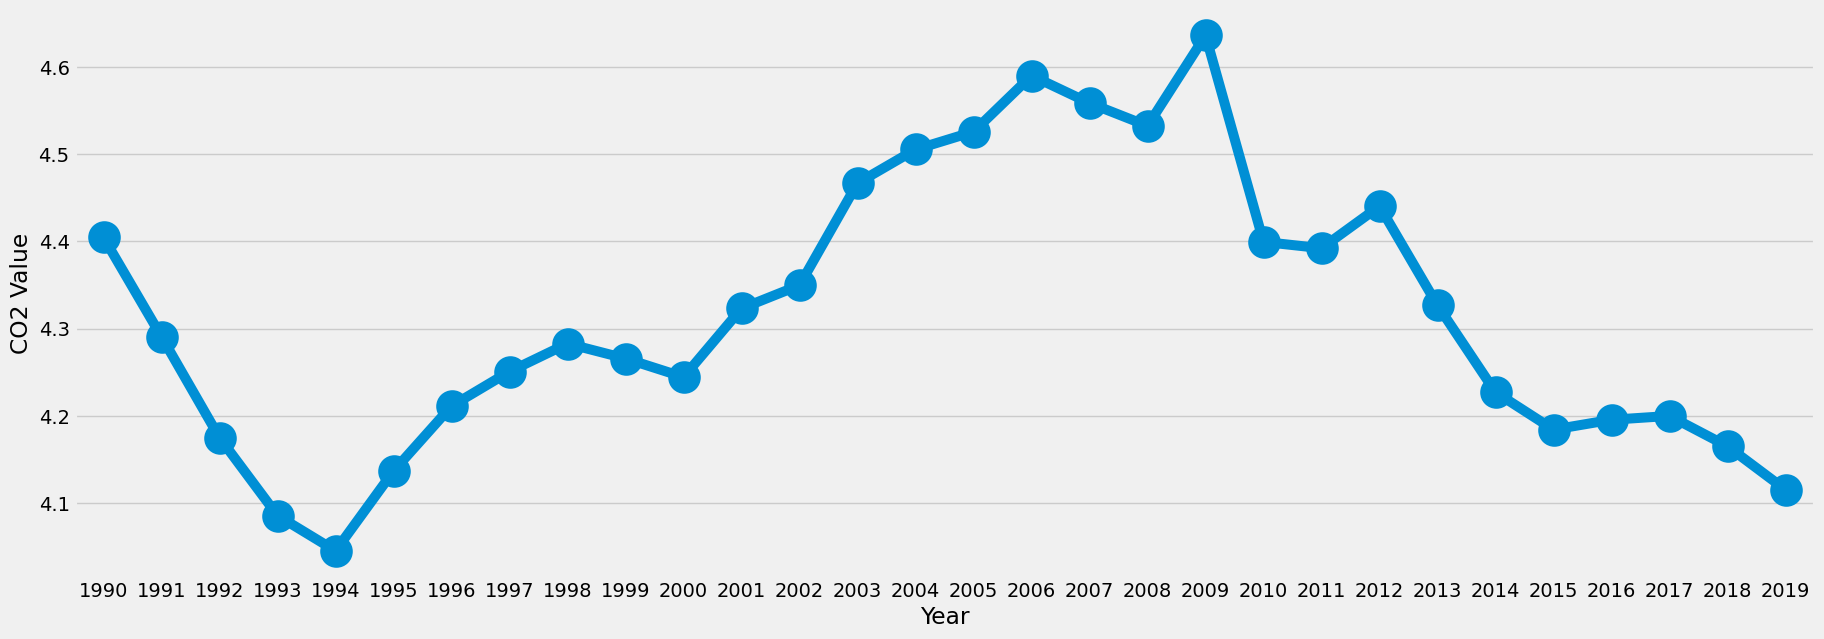

In [28]:
year = df1.groupby('Year')['CO2 Value'].mean().reset_index()
plt.figure(figsize=(20,7))
sns.pointplot(data=year,x='Year',y='CO2 Value')

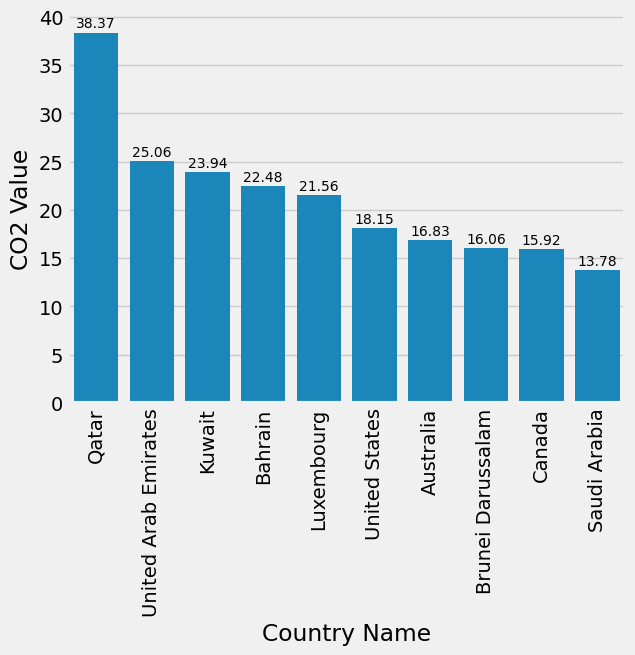

In [29]:
country = round(df1.groupby('Country Name')['CO2 Value'].mean().reset_index().sort_values('CO2 Value',ascending=False),2)
country = country.head(10).reset_index(drop=True)
g = sns.barplot(data=country,x='Country Name',y='CO2 Value')
for v in country.itertuples():
    #print(v)
    g.text(x=v.Index,y=v._2+0.5,s=str(v._2), size=10, ha="center")
plt.xticks(rotation=90)
plt.show()

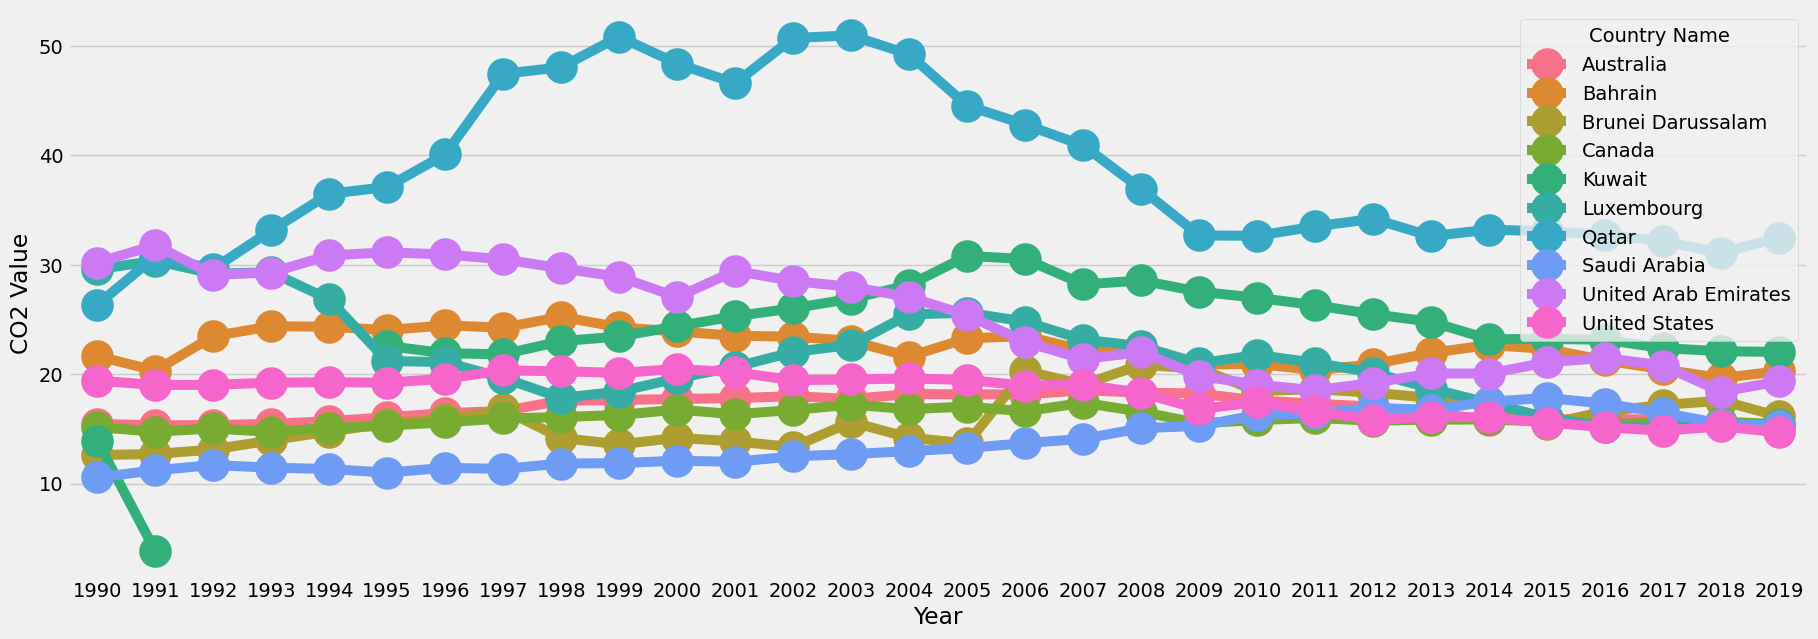

In [30]:
year_country = df1.groupby(['Year','Country Name'])['CO2 Value'].mean().reset_index()
year_country = year_country[year_country['Country Name'].isin(country['Country Name'])]
plt.figure(figsize=(20,7))
sns.pointplot(data=year_country,x='Year',y='CO2 Value',hue='Country Name')
plt.show()

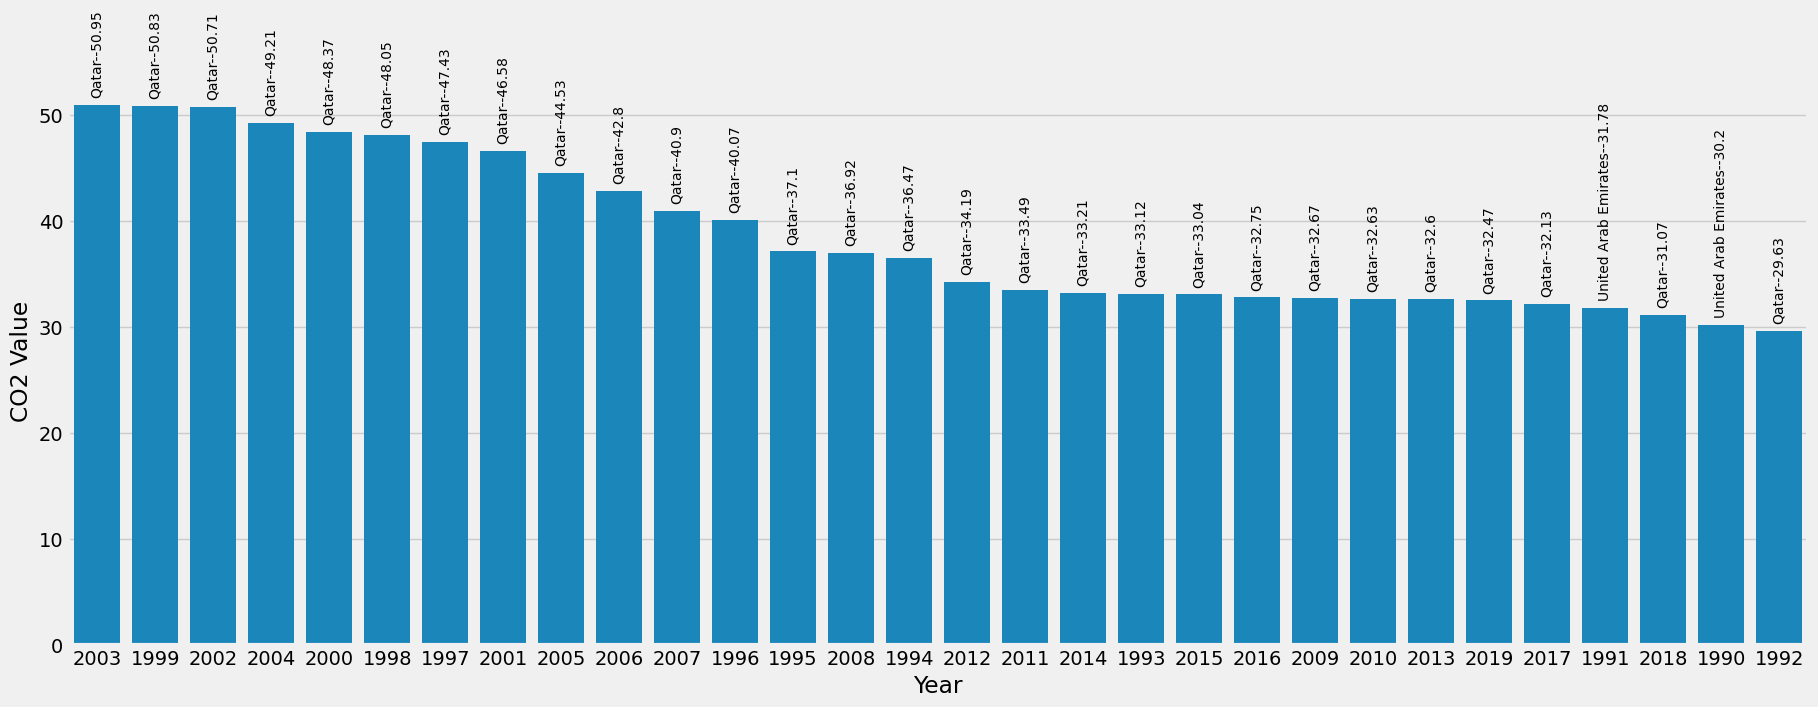

In [31]:
year_country_co2 = round(df1.groupby(['Year','Country Name'])['CO2 Value'].mean().reset_index().sort_values('CO2 Value',ascending=False).groupby('Year').head(1).reset_index(drop=True),2)
plt.figure(figsize=(20,7))
g = sns.barplot(data=year_country_co2,x='Year',y='CO2 Value')
country = year_country_co2['Country Name']
for v in year_country_co2.itertuples():
    #print(v)
    g.text(x=v.Index,y=v._3+1,s=str(v._2 + '--' +str(round(v._3, 2))), size=10, rotation=90, ha="center")   
plt.show()